# Multi-class Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from display_data import *
from sigmoid import *
from cross_entropy_loss_reg import *
from one_vs_all import *

In [2]:
data = loadmat('ex3data.mat')
X = data['X']
y = data['y']

m, n = X.shape
input_layer_size = 400
labels = 10

# Randomly select 100 training examples
random_indices = np.random.randint(0, m, size=100)
vis_data = X[random_indices, :]

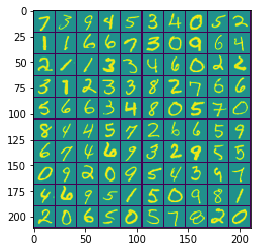

In [3]:
display_data(vis_data);

In [4]:
theta_test = np.array([-2, -1, 1, 2])
a = np.array(range(1,16))
a = a / 10
a = np.reshape(a, (5, 3))
X_test = np.concatenate((np.ones((5, 1)), a), axis=-1)
y_test = (np.array([1, 0, 1, 0, 1]) >= 0.5).reshape((5,1))
print(y_test.shape)
lambda_test = 3
cross_entropy_loss_reg(theta_test, X_test, y_test.astype(np.int), lambda_test)
cross_entropy_gradient_reg(theta_test, X_test, y_test.astype(np.int), lambda_test)

(5, 1)


array([-0.60628251, -0.61554657,  0.52382518,  1.06319693])

In [5]:
big_theta = one_vs_all(X, y, reg_lambda=0.1, K=labels)

In [6]:
X_train = np.concatenate((np.ones((m, 1)), X), axis=-1)
p_index = np.zeros((m, 1))
p_index = np.argmax(sigmoid(np.dot(X_train, np.transpose(big_theta))), axis=1)
acc = np.mean(p_index == y.ravel())
print("Model accuracy:", acc)

Model accuracy: 0.9552
